In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson,mannwhitneyu


# Reading the dataset

In [4]:
# Reading the input file
diabetes_ip_file=pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_ip_file.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Checking the summary stats - initially without going into specific details
summary_stats = diabetes_ip_file.describe()
summary_stats

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Looking into the number of missing rows across the columns
diabetes_ip_file.isnull().sum()# No missing values
diabetes_ip_file.shape#(100000,9)
diabetes_ip_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Intial exploration

In [7]:
diabetes_ip_file['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

## Summary stats block
### 1. % of people getting diabetes at different age groups
### 2. split the above into gender
### 3. bin the above into age groups and plot them
### 4. % of patients who smoke and have diabetes
### 5. % of non smokers and have diabetes
### 6. correlation between diabetes and smoking and diabetes and hypertension
### 7. correlation between all the different parameters


In [8]:
diabetes_ip_file.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
diabetes_ip_file['smoking_history'].unique()# 'never', 'No Info', 'current', 'former', 'ever', 'not current'

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/2805178319.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_by_age_gender = diabetes_filtered.groupby(['age_group', 'gender'])['diabetes'].mean().unstack()


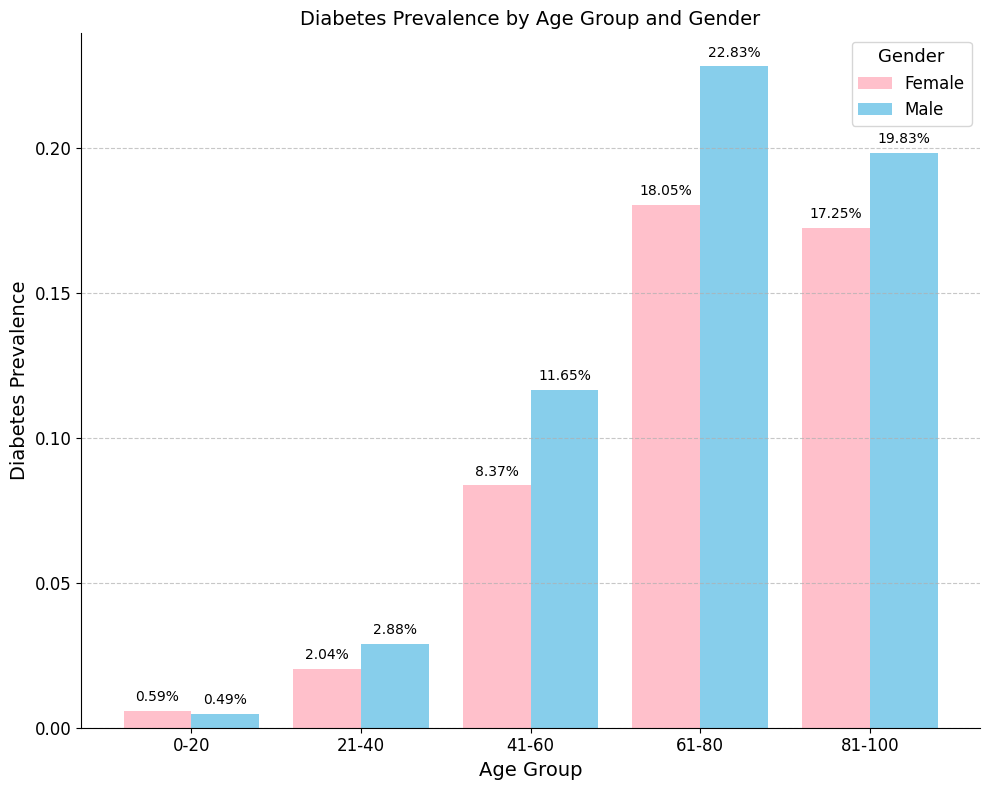

In [10]:
# Diabetes Prevalance across different age groups and comparison between genders

bins = [0, 20, 40, 60, 80, 100]  # Customize bins as needed
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
diabetes_ip_file['age_group'] = pd.cut(diabetes_ip_file['age'], bins=bins, labels=labels, right=False)

# Filter out "Other" gender
diabetes_filtered = diabetes_ip_file[diabetes_ip_file['gender'].isin(['Male', 'Female'])]

diabetes_by_age_gender = diabetes_filtered.groupby(['age_group', 'gender'])['diabetes'].mean().unstack()

colors = ['pink','skyblue']  
ax = diabetes_by_age_gender.plot(kind='bar', figsize=(10, 8), color=colors, width=0.8)

# Customizing Plot Appearance
plt.title("Diabetes Prevalence by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Diabetes Prevalence", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Gender", fontsize=12, title_fontsize=13)

# Adding Data Labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Improved Grid Lines and Spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Tight Layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/2295328768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feat, y=num_feat, data=diabetes_ip_file,


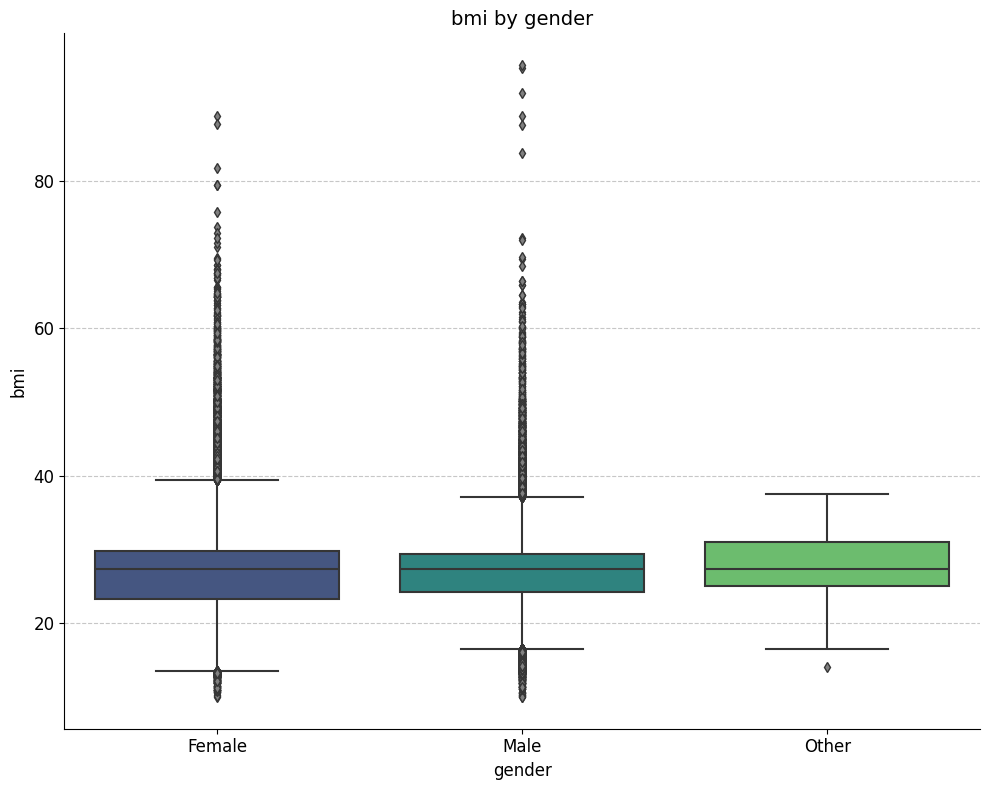

/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/2295328768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feat, y=num_feat, data=diabetes_ip_file,


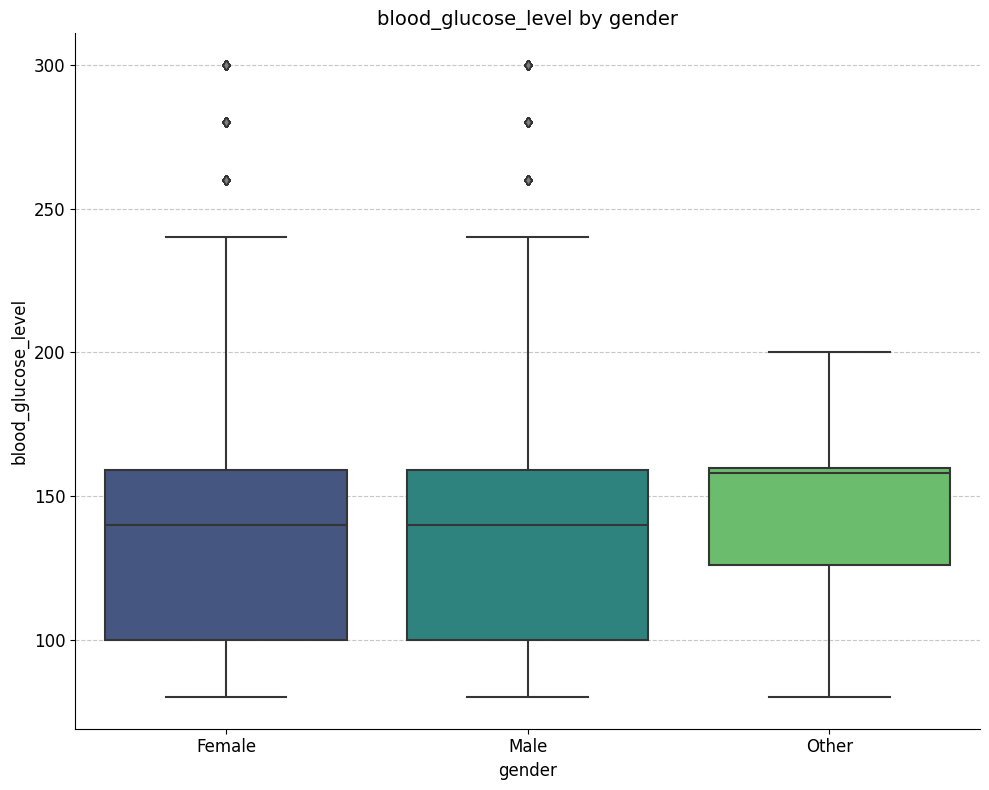

/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/2295328768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feat, y=num_feat, data=diabetes_ip_file,


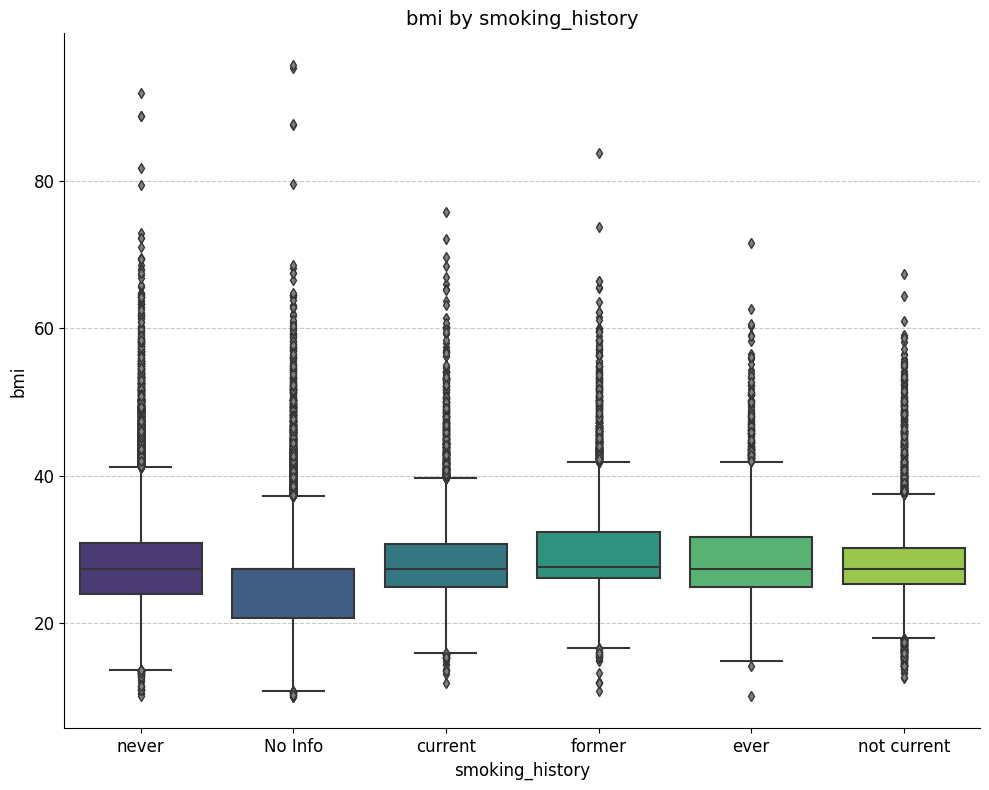

/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/2295328768.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feat, y=num_feat, data=diabetes_ip_file,


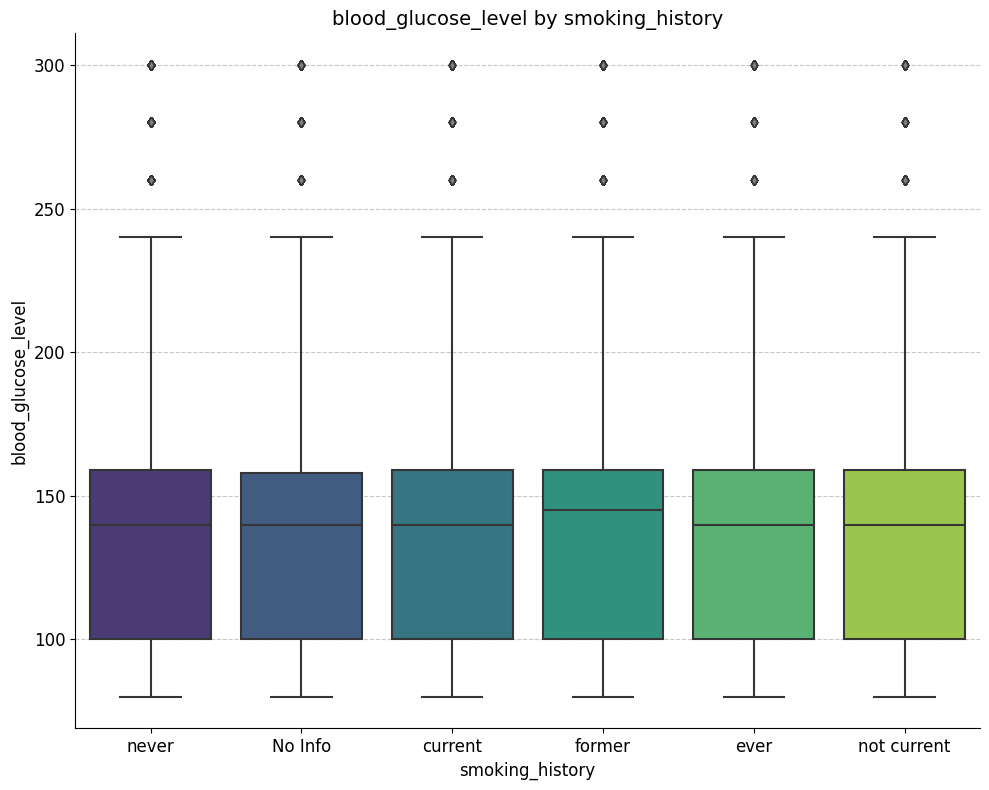

In [11]:


categorical_features = ['gender', 'smoking_history']
numerical_features = ['bmi', 'blood_glucose_level']

for cat_feat in categorical_features:
    for num_feat in numerical_features:
        plt.figure(figsize=(10, 8))  # Increased figure size
        sns.boxplot(x=cat_feat, y=num_feat, data=diabetes_ip_file,
                    palette='viridis',  
                    linewidth=1.5,  # Increased linewidth for better visibility
                    flierprops={"marker": "d", "markersize": 5, "markerfacecolor": "gray"})  # Customize outliers

        plt.title(f'{num_feat} by {cat_feat}', fontsize=14)
        plt.xlabel(cat_feat, fontsize=12)
        plt.ylabel(num_feat, fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Improved Grid Lines and Spines
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        sns.despine()

        plt.tight_layout()
        plt.show()

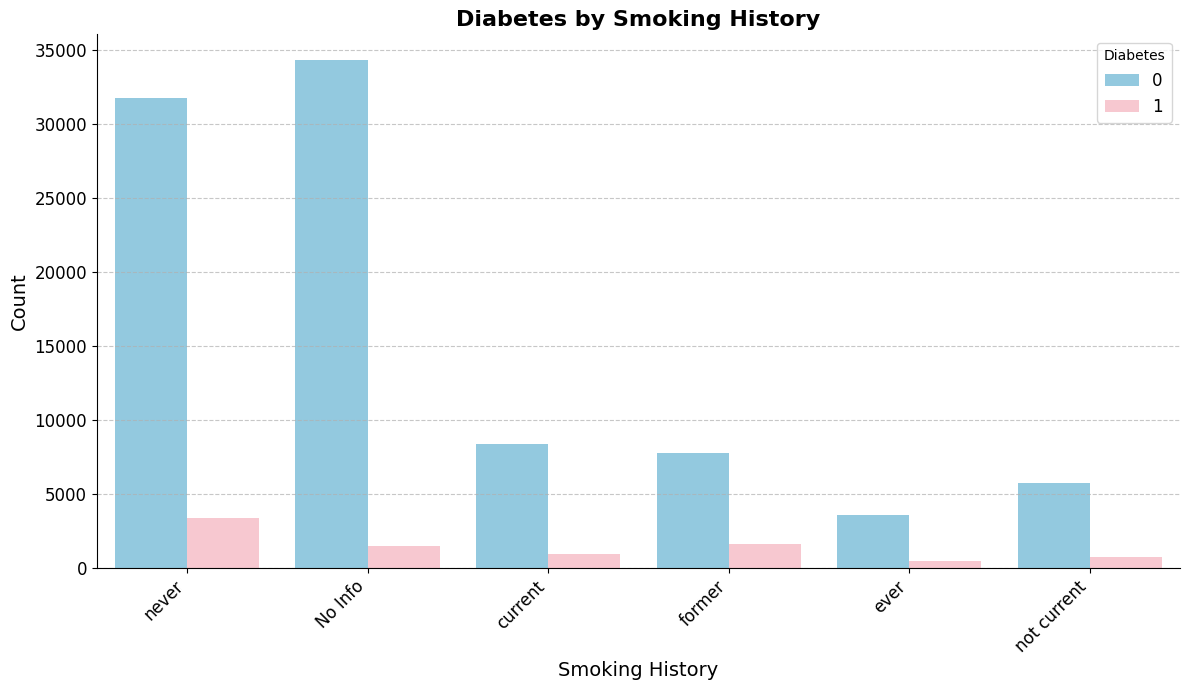

In [12]:
# count plot for diabetes by smoking history
colors = ['skyblue','pink']
plt.figure(figsize=(12, 7)) #increase figure size
sns.countplot(x='smoking_history', hue='diabetes', data=diabetes_ip_file, palette=colors)

plt.title('Diabetes by Smoking History', fontsize=16, fontweight='bold')
plt.xlabel('Smoking History', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) #Rotate x axis labels.
plt.yticks(fontsize=12)
plt.legend(title='Diabetes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
sns.despine() #remove top and right spines
plt.tight_layout()
plt.show()

# Statistical Analysis Block

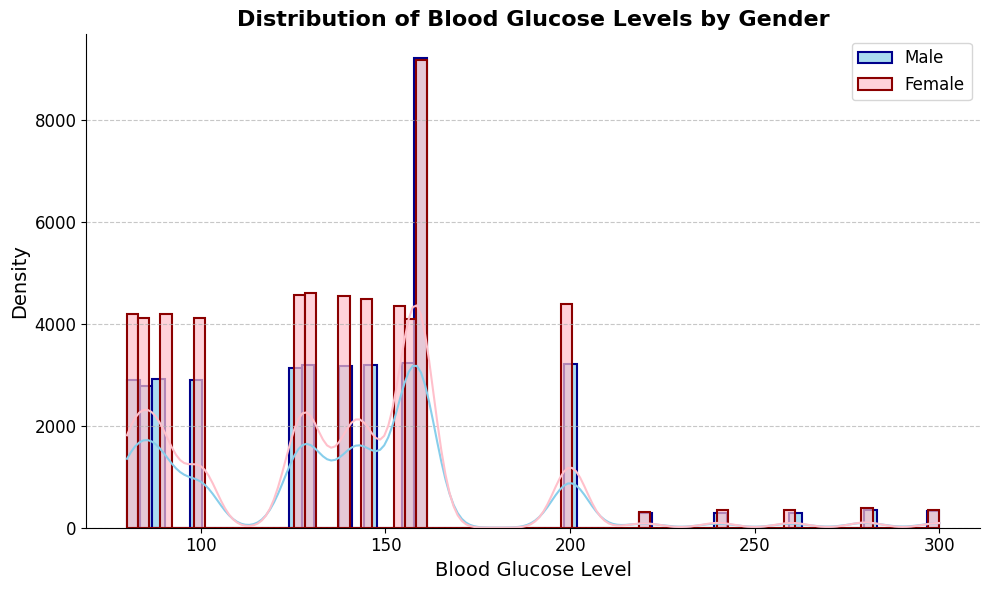

In [13]:
# Visualizing the distribution of Blood glucose levels
# Checking the distribution of Gender and its impact on blood_glucose_level
plt.figure(figsize=(10, 6))  # Increased figure size

# Plot Male distribution
sns.histplot(diabetes_ip_file[diabetes_ip_file['gender'] == 'Male']['blood_glucose_level'],
             kde=True, label='Male', color='skyblue', alpha=0.7, linewidth=1.5, edgecolor='darkblue') #Enhanced visuals

# Plot Female distribution
sns.histplot(diabetes_ip_file[diabetes_ip_file['gender'] == 'Female']['blood_glucose_level'],
             kde=True, label='Female', color='pink', alpha=0.7, linewidth=1.5, edgecolor='darkred') #Enhanced visuals

# Labels and title
plt.xlabel('Blood Glucose Level', fontsize=14)
plt.ylabel('Density', fontsize=14) #Changed to density, since we have KDE
plt.title('Distribution of Blood Glucose Levels by Gender', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Improved Grid Lines and Spines
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Tight Layout
plt.tight_layout()

# Show the plot
plt.show()


In [14]:

# Segregating the Male and Female data
diabetes_men=diabetes_ip_file.loc[diabetes_ip_file['gender']=='Male']['blood_glucose_level']
diabetes_women=diabetes_ip_file.loc[diabetes_ip_file['gender']=='Female']['blood_glucose_level']
print("Shape of Men's blood glucose levels:", diabetes_men.shape)
print("Shape of Women's blood glucose levels:", diabetes_women.shape)

alpha = 0.05

stat_men_ks, p_men_ks = kstest(diabetes_men, 'norm', args=(diabetes_men.mean(), diabetes_men.std()))
print("Men's KS Test: Statistic =", stat_men_ks, ", p-value =", p_men_ks)
if p_men_ks > alpha:
    print("Men's blood glucose level: Distribution looks Gaussian (fail to reject H0)")
else:
    print("Men's blood glucose level: Distribution does not look Gaussian (reject H0)")


stat_women_ks, p_women_ks = kstest(diabetes_women, 'norm', args=(diabetes_women.mean(), diabetes_women.std()))
print("Women's KS Test: Statistic =", stat_women_ks, ", p-value =", p_women_ks)

if p_women_ks > alpha:
    print("Women's blood glucose level: Distribution looks Gaussian (fail to reject H0)")
else:
    print("Women's blood glucose level: Distribution does not look Gaussian (reject H0)")

# Shapiro-Wilk Test (for comparison)
stat_men_shapiro, p_men_shapiro = shapiro(diabetes_men.sample(5000)) #Shapiro test has limitations on sample size.
print("Men's Shapiro Test: Statistic =", stat_men_shapiro, ", p-value =", p_men_shapiro)

stat_women_shapiro, p_women_shapiro = shapiro(diabetes_women.sample(5000)) #Shapiro test has limitations on sample size.
print("Women's Shapiro Test: Statistic =", stat_women_shapiro, ", p-value =", p_women_shapiro)



# Based on KS and Shapiro results, we will assume non-normal distribution.
stat_mann, p_mann = mannwhitneyu(diabetes_men, diabetes_women)
print("Mann-Whitney U Test: Statistic =", stat_mann, ", p-value =", p_mann)

if p_mann < alpha:
    print("There is a significant difference in blood glucose levels between men and women.")
else:
    print("There is no significant difference in blood glucose levels between men and women.")

#If the data was normally distributed, you would use this instead.
#stat_ttest, p_ttest = ttest_ind(df_men, df_women)
#print("T-test: Statistic =", stat_ttest, ", p-value =", p_ttest)

Shape of Men's blood glucose levels: (41430,)
Shape of Women's blood glucose levels: (58552,)
Men's KS Test: Statistic = 0.19112287738142408 , p-value = 0.0
Men's blood glucose level: Distribution does not look Gaussian (reject H0)
Women's KS Test: Statistic = 0.18240492795328966 , p-value = 0.0
Women's blood glucose level: Distribution does not look Gaussian (reject H0)
Men's Shapiro Test: Statistic = 0.898062671717092 , p-value = 1.5590209625249113e-49
Women's Shapiro Test: Statistic = 0.9025176157217928 , p-value = 8.797310448441361e-49
Mann-Whitney U Test: Statistic = 1229227129.0 , p-value = 0.00027214119803288826
There is a significant difference in blood glucose levels between men and women.


----------------------------------------
Mann-Whitney U Test Results
----------------------------------------
U Statistic: 1229227129.00
p-value: 1.3607e-04
Result: Men have significantly higher blood glucose levels than women.
Mean blood glucose level for men: 138.89
Mean blood glucose level for women: 137.47
----------------------------------------


/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/3859802146.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file,
/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/3859802146.py:30: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file,


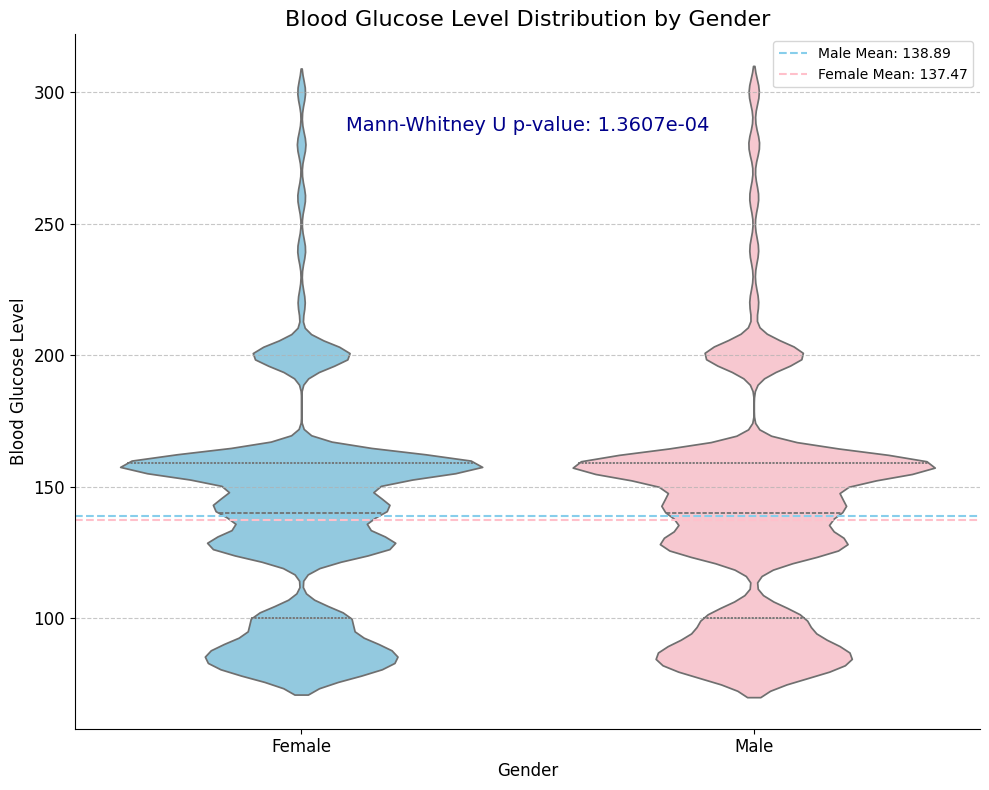

In [15]:
# Both the male and female blood glucose levels are not normally distributed, and there is a significant difference between the two groups.
from scipy.stats import mannwhitneyu


# Mann-Whitney U Test
stat, p = mannwhitneyu(diabetes_men, diabetes_women, alternative='greater')

# Enhanced Statistical Output
print("-" * 40)
print("Mann-Whitney U Test Results")
print("-" * 40)
print(f"U Statistic: {stat:.2f}")
print(f"p-value: {p:.4e}")  # Use scientific notation for p-value

alpha = 0.05
if p < alpha:
    print("\033[1mResult:\033[0m Men have significantly higher blood glucose levels than women.") #Bolded result
else:
    print("\033[1mResult:\033[0m There is no significant difference, or women have higher blood glucose levels.") #Bolded result

mean_men = diabetes_men.mean()
mean_women = diabetes_women.mean()
print(f"Mean blood glucose level for men: {mean_men:.2f}")
print(f"Mean blood glucose level for women: {mean_women:.2f}")
print("-" * 40)

diabetes_ip_file=diabetes_ip_file.loc[diabetes_ip_file['gender'].isin(['Male','Female'])]
# Enhanced Violin Plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file,
               palette=['skyblue', 'pink'], inner='quartile', scale='count')

# Add p-value (more prominent)
plt.text(0.5, diabetes_ip_file['blood_glucose_level'].max() * 0.95, f"Mann-Whitney U p-value: {p:.4e}",
         ha='center', fontsize=14, color='darkblue')

# Mean lines
plt.axhline(diabetes_men.mean(), color = 'skyblue', linestyle = '--', linewidth = 1.5, label = f"Male Mean: {diabetes_men.mean():.2f}")
plt.axhline(diabetes_women.mean(), color = 'pink', linestyle = '--', linewidth = 1.5, label = f"Female Mean: {diabetes_women.mean():.2f}")

# Enhanced Plot Aesthetics
plt.title("Blood Glucose Level Distribution by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.legend()
plt.tight_layout()

plt.show()

----------------------------------------
Mann-Whitney U Test Results
----------------------------------------
U Statistic: 1229227129.00
p-value: 1.3607e-04
Result: Men have significantly higher blood glucose levels than women.
Mean blood glucose level for men: 138.89
Mean blood glucose level for women: 137.47
----------------------------------------


/var/folders/78/vykvv3p5317_39fydydf88y80000gn/T/ipykernel_22792/373009710.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file,


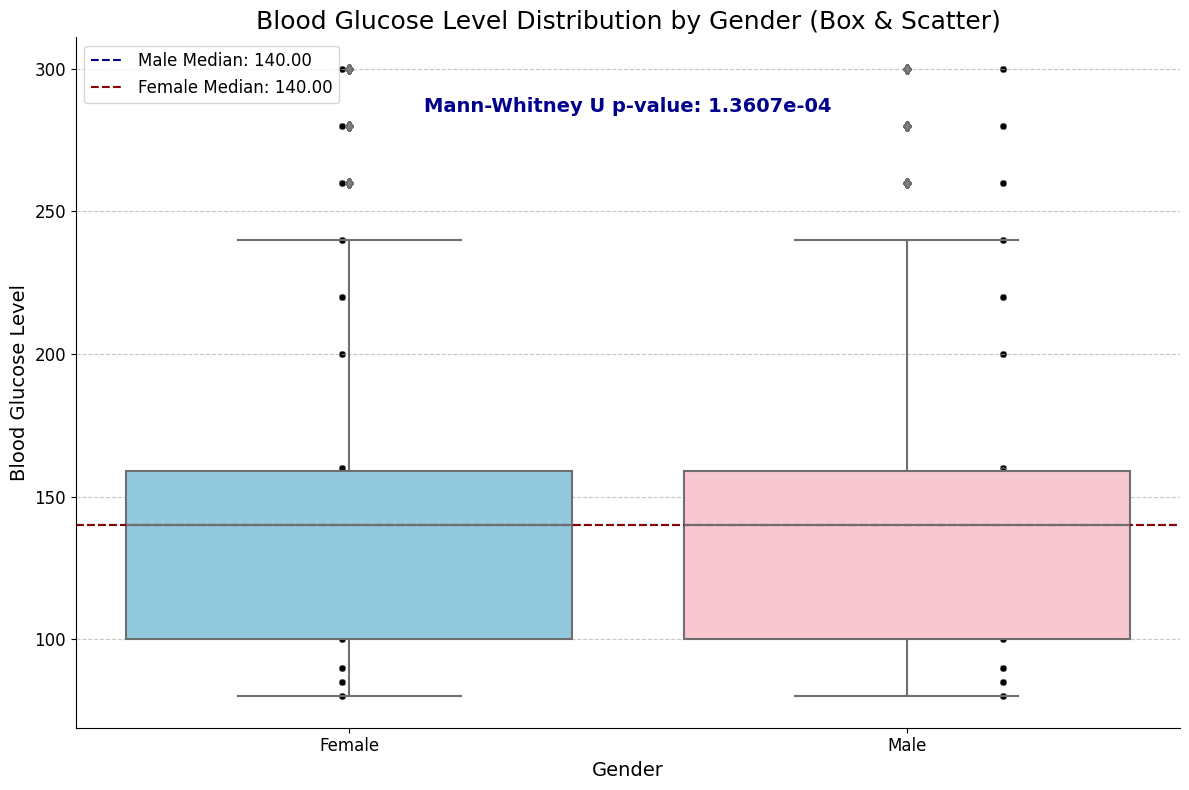

In [16]:
# Both the male and female blood glucose levels are not normally distributed, and there is a significant difference between the two groups.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

# Assuming your DataFrames are named 'diabetes_men', 'diabetes_women', and 'diabetes_ip_file'

# Mann-Whitney U Test (same as before)
stat, p = mannwhitneyu(diabetes_men, diabetes_women, alternative='greater')
print("-" * 40)
print("Mann-Whitney U Test Results")
print("-" * 40)
print(f"U Statistic: {stat:.2f}")
print(f"p-value: {p:.4e}")
alpha = 0.05
if p < alpha:
    print("\033[1mResult:\033[0m Men have significantly higher blood glucose levels than women.")
else:
    print("\033[1mResult:\033[0m There is no significant difference, or women have higher blood glucose levels.")
mean_men = diabetes_men.mean()
mean_women = diabetes_women.mean()
print(f"Mean blood glucose level for men: {mean_men:.2f}")
print(f"Mean blood glucose level for women: {mean_women:.2f}")
print("-" * 40)

diabetes_ip_file = diabetes_ip_file.loc[diabetes_ip_file['gender'].isin(['Male', 'Female'])]

# Enhanced Box Plot with Distribution Scatter
plt.figure(figsize=(12, 8))  # Increased figure size

# Box plot
sns.boxplot(x='gender', y='blood_glucose_level', data=diabetes_ip_file,
            palette=['skyblue', 'pink'], linewidth=1.5,
            flierprops={"marker": "d", "markersize": 5, "markerfacecolor": "gray"})

# Scatter plot within each box with manual jitter
for gender in diabetes_ip_file['gender'].unique():
    subset = diabetes_ip_file[diabetes_ip_file['gender'] == gender]
    x_positions = [i + np.random.uniform(-0.2, 0.2) for i, val in enumerate(diabetes_ip_file['gender'].unique()) if val == gender] * len(subset)
    sns.scatterplot(x=x_positions, y=subset['blood_glucose_level'],
                    color='black', alpha=0.5, s=25, zorder=1) #Increased alpha and size, added zorder

# Add p-value (more prominent)
plt.text(0.5, diabetes_ip_file['blood_glucose_level'].max() * 0.95, f"Mann-Whitney U p-value: {p:.4e}",
         ha='center', fontsize=14, color='darkblue', fontweight='bold')

# Median lines
median_men = diabetes_men.median()
median_women = diabetes_women.median()

plt.axhline(median_men, color='darkblue', linestyle='--', linewidth=1.5, label=f"Male Median: {median_men:.2f}")
plt.axhline(median_women, color='darkred', linestyle='--', linewidth=1.5, label=f"Female Median: {median_women:.2f}")

# Enhanced Plot Aesthetics
plt.title("Blood Glucose Level Distribution by Gender (Box & Scatter)", fontsize=18) #Increased fontsize
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Blood Glucose Level", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

In [17]:
diabetes_ip_file.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,81-100
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,41-60
2,Male,28.0,0,0,never,27.32,5.7,158,0,21-40
3,Female,36.0,0,0,current,23.45,5.0,155,0,21-40
4,Male,76.0,1,1,current,20.14,4.8,155,0,61-80


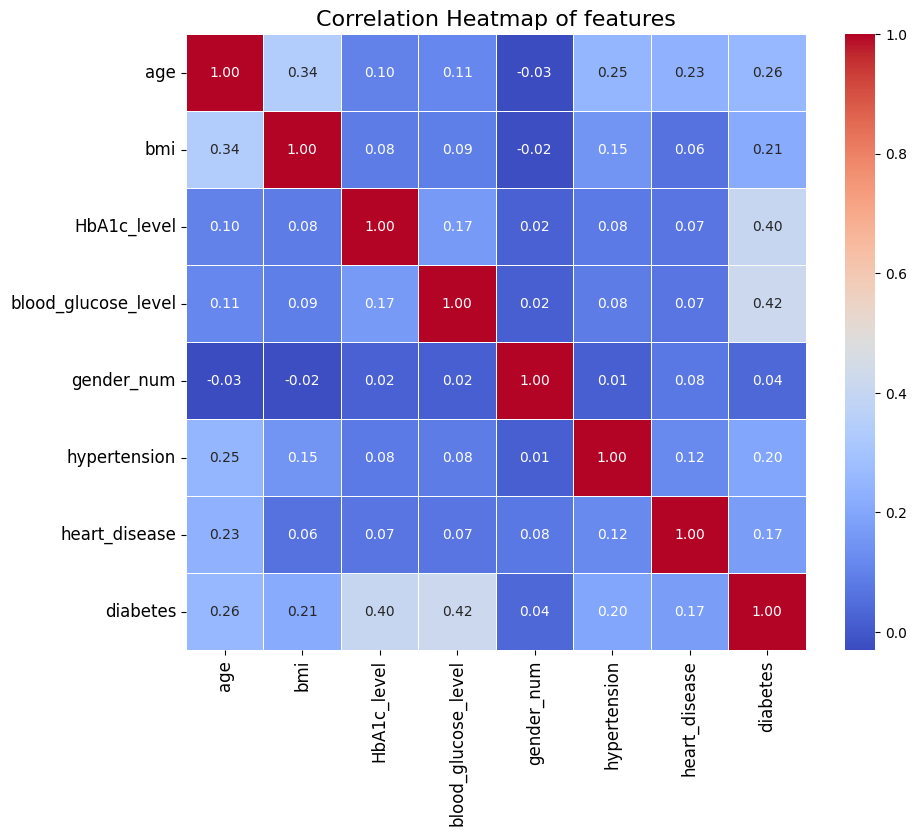

In [18]:
# Correlation plot - Heat map

diabetes_ip_file['gender_num'] = diabetes_ip_file['gender'].map({'Female': 0, 'Male': 1})

# Include 'gender_num' in the list of numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','gender_num','hypertension','heart_disease' ,'diabetes']
correlation_matrix = diabetes_ip_file[numerical_features].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size to accommodate the new column
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Strong Positive Correlation with Blood Glucose Level (0.42): This indicates a relatively strong positive relationship. As blood glucose levels increase, the likelihood of having diabetes also increases. This is expected and aligns with the medical understanding of diabetes.

### Moderate Positive Correlation with HbA1c Level (0.40): HbA1c is a measure of long-term blood sugar control. A higher HbA1c level is associated with a higher probability of diabetes.

<Figure size 1000x800 with 0 Axes>

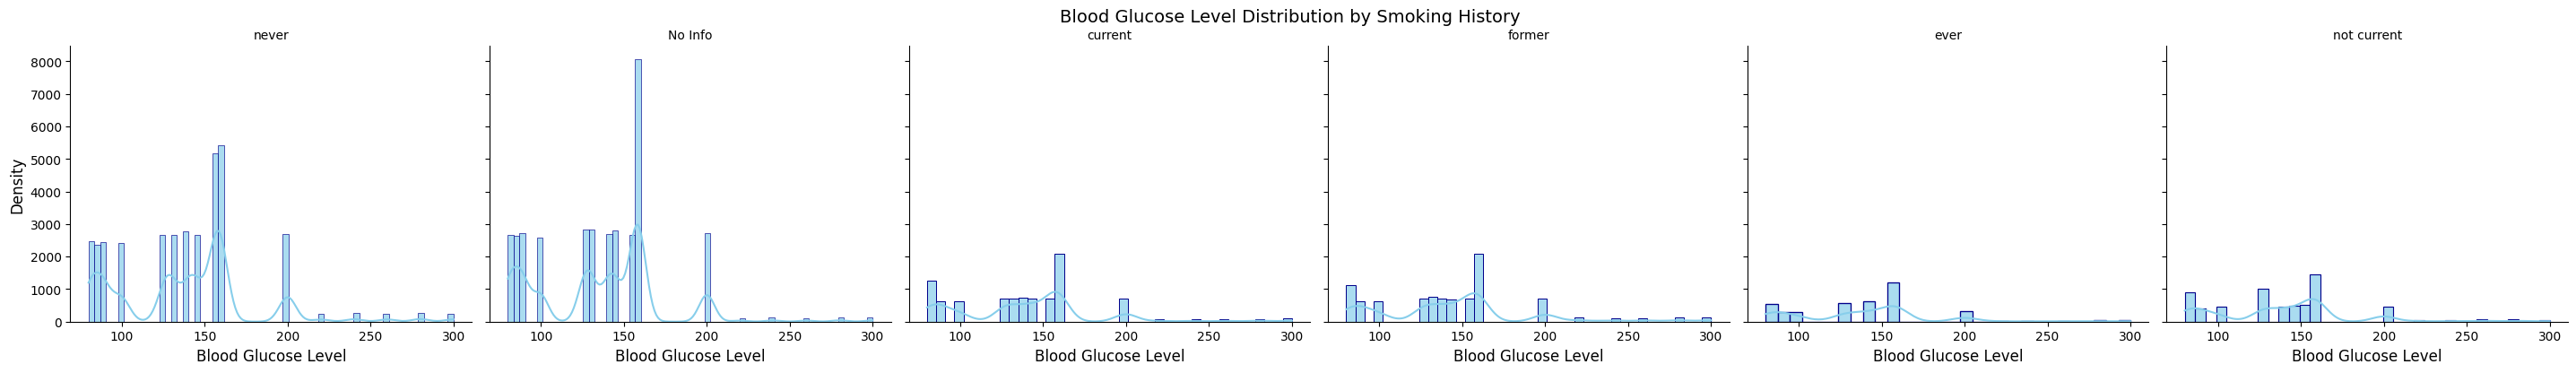

In [19]:
# smoking history and blood glucose level
plt.figure(figsize=(10, 8))  # Set overall figure size

g = sns.FacetGrid(diabetes_ip_file, col='smoking_history', height=4, aspect=1.2) #adjusted height and aspect
g.map(sns.histplot, 'blood_glucose_level', kde=True, alpha=0.7, color='skyblue', edgecolor='darkblue') #added kde, alpha, color, and edgecolor

g.set_axis_labels("Blood Glucose Level", "Density") #changed y label to density because of kde.
g.set_titles(col_template="{col_name}") #removed col_name = part of title.

for ax in g.axes.flat: #Loop through axes to set fontsize.
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

g.fig.suptitle("Blood Glucose Level Distribution by Smoking History", fontsize=14, y=1.02) #added suptitle

sns.despine() #removed top and right spines
plt.show()

<Figure size 1000x800 with 0 Axes>

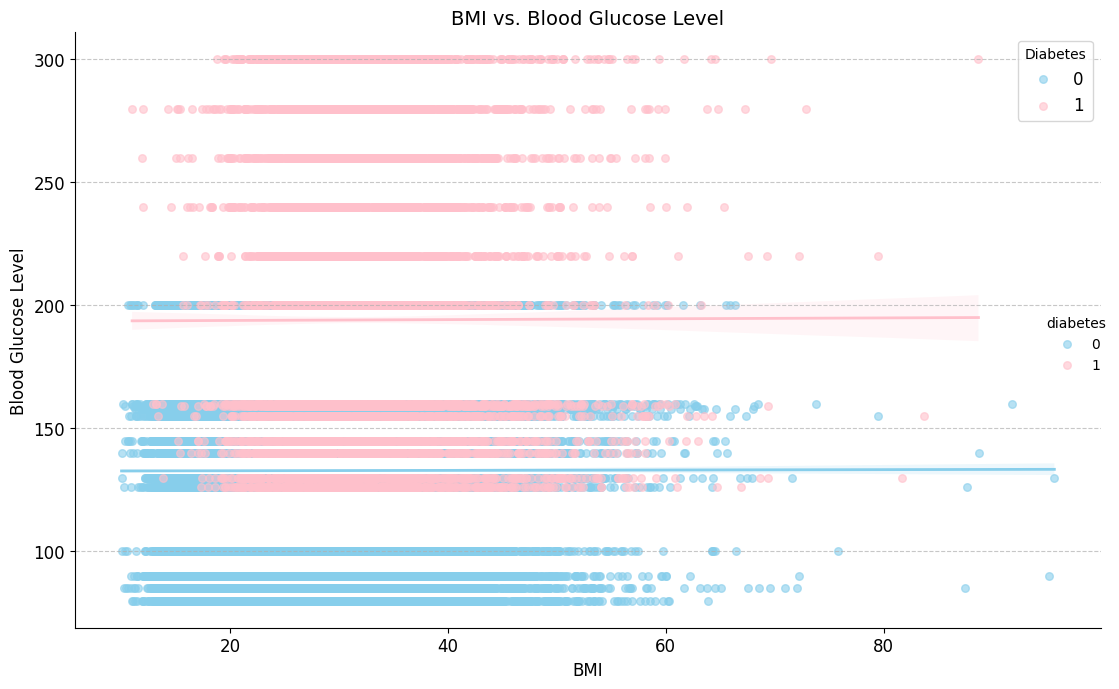

In [20]:
# Regression plot - BMI vs Blood Glucose Level
plt.figure(figsize=(10, 8))  # Increased figure size
sns.lmplot(x='bmi', y='blood_glucose_level', data=diabetes_ip_file, hue='diabetes',
           scatter_kws={'alpha': 0.6, 's': 30},  # Customize scatter points
           line_kws={'linewidth': 2},  # Customize regression lines
           palette=['skyblue', 'pink'],  # Use a more visually appealing palette
           height=7, aspect=1.5)  # Adjust plot dimensions

plt.title("BMI vs. Blood Glucose Level", fontsize=14)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Blood Glucose Level", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Diabetes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()  # Remove top and right spines
plt.tight_layout()

plt.show()

In [21]:
diabetes_ip_file

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,gender_num
0,Female,80.0,0,1,never,25.19,6.6,140,0,81-100,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,41-60,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,21-40,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,21-40,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,61-80,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,81-100,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,0-20,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0,61-80,1
99998,Female,24.0,0,0,never,35.42,4.0,100,0,21-40,0
